In [1]:
import os 
import datetime 

import pandas as pd
import matplotlib.pyplot as plt

from utils.utils import load_pickle
from utils.lookups import kernel_lookup
from postprocessing.filter_funcs import filter_all_stations

In [2]:
# Get data
data_root = "../data"
data_fname = "df_obs_2023pp.h5"
metadata_fname = "df_metadata.h5"

df_obs_fpath = os.path.join(data_root, data_fname)
df_meta_fpath = os.path.join(data_root, metadata_fname)

start_date = datetime.datetime(2023, 12, 1, 0, 0, 0)
end_date = datetime.datetime(2024, 2, 1, 0, 0, 0)
df_meta = load_pickle(df_meta_fpath)
df_obs = pd.read_hdf(df_obs_fpath, key='df_obs')

# Stations with decent snow data:
snow_stids = kernel_lookup.keys()

# Subset the df to only include stations in snow_stids 
df_obs = df_obs[df_obs['stid'].isin(snow_stids)]


In [3]:
df_obs


,air_temp,altimeter,dew_point_temperature,elevation,latitude,longitude,ozone_concentration,pressure,region,relative_humidity,sea_level_pressure,snow_depth,snow_water_equiv,soil_temp,solar_radiation,stid,wind_direction,wind_gust,wind_speed
date_time,,,,,,,,,,,,,,,,,,,
2022-12-01 00:00:00+00:00,-8.703125,NaN,NaN,3192.0,40.78125,-110.0000,NaN,NaN,uinta_basin,NaN,NaN,406.50,83.8125,NaN,NaN,CWHU1,NaN,NaN,NaN
2022-12-01 01:00:00+00:00,-9.203125,NaN,NaN,3192.0,40.78125,-110.0000,NaN,NaN,uinta_basin,NaN,NaN,406.50,81.2500,NaN,NaN,CWHU1,NaN,NaN,NaN
2022-12-01 02:00:00+00:00,-10.398438,NaN,NaN,3192.0,40.78125,-110.0000,NaN,NaN,uinta_basin,NaN,NaN,406.50,81.2500,NaN,NaN,CWHU1,NaN,NaN,NaN
2022-12-01 03:00:00+00:00,-10.796875,NaN,NaN,3192.0,40.78125,-110.0000,NaN,NaN,uinta_basin,NaN,NaN,406.50,81.2500,NaN,NaN,CWHU1,NaN,NaN,NaN
2022-12-01 04:00:00+00:00,-9.0,NaN,NaN,3192.0,40.78125,-110.0000,NaN,NaN,uinta_basin,NaN,NaN,406.50,81.2500,NaN,NaN,CWHU1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:40:00+00:00,3.505859,NaN,NaN,1743.0,40.43750,-111.6875,NaN,NaN,sslv,97.0000,NaN,386.25,NaN,NaN,NaN,LPTUT,13.976562,0.925781,0.086975
2023-03-14 23:45:00+00:00,3.505859,NaN,NaN,1743.0,40.43750,-111.6875,NaN,NaN,sslv,97.6875,NaN,385.75,NaN,NaN,NaN,LPTUT,13.132812,0.776855,0.062012
2023-03-14 23:50:00+00:00,3.566406,NaN,NaN,1743.0,40.43750,-111.6875,NaN,NaN,sslv,98.3125,NaN,377.50,NaN,NaN,NaN,LPTUT,NaN,0.000000,0.000000


In [4]:
# We need the following function to split data by stid, sort by time, apply filter, and then recombine

df_filt = filter_all_stations(df_obs, "snow_depth", filt_method="max_median")


/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41:

Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.


/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41:

Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.


/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41:

Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.


/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')


Max filtering applied.
Max filtering applied.
No max filtering for COOP station.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
Max filtering applied.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.
No max filtering for COOP station.


/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filtered = df_filtered.interpolate(method='linear')
/Users/johnlawson/PycharmProjects/snowshadow/postprocessing/filter_funcs.py:41:

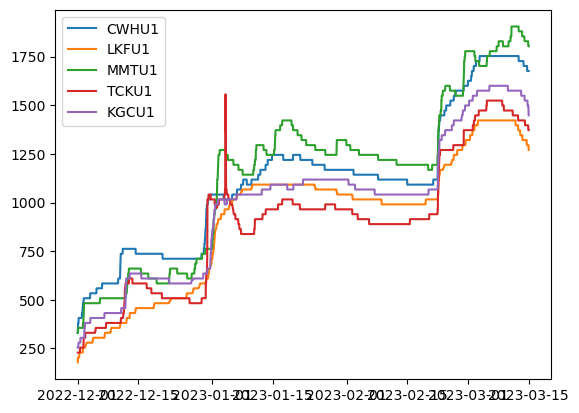

In [5]:
# Visualise data for the first five stids


for stid in df_filt['stid'].unique()[:5]:
    df_stid = df_filt[df_filt['stid'] == stid]
    plt.plot(df_stid.index, df_stid['snow_depth_filtered'], label=stid)
plt.legend()
plt.show()